# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
pd.read_csv('craftcans.csv')
df=pd.read_csv('craftcans.csv')
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

In [5]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [6]:
df.sort_values(by="Beer", ascending=False).head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
928,"the Kimmie, the Yink and the Holy Gose",Anderson Valley Brewing Company,"Boonville, CA",Gose,12 oz.,4.80%,Does not apply
1651,oSKAr the G'Rauch,Oskar Blues Brewery,"Longmont, CO",American IPA,16 oz.,8.50%,Does not apply
1650,oSKAr the G'Rauch,Oskar Blues Brewery,"Longmont, CO",American IPA,19.2 oz.,8.50%,Does not apply
1981,Zonker Stout,Snake River Brewing Company,"Jackson, WY",Foreign / Export Stout,12 oz.,5.40%,36
930,Zombie Monkie,Tallgrass Brewing Company,"Manhattan, KS",American Porter,16 oz.,6.20%,35
740,Zen,Rhinegeist Brewery,"Cincinnati, OH",American Pale Ale (APA),12 oz.,4.30%,45
1931,Zaison (2012),Brewery Vivant,"Grand Rapids, MI",Saison / Farmhouse Ale,16 oz.,9.00%,Does not apply
1386,Zaison,Brewery Vivant,"Grand Rapids, MI",Saison / Farmhouse Ale,16 oz.,9.00%,Does not apply
1065,Yunkin' Punkin',Manayunk Brewing Company,"Philadelphia, PA",Pumpkin Ale,12 oz.,5.50%,Does not apply
865,"You're My Boy, Blue",Brew Bus Brewing,"Tampa, FL",Fruit / Vegetable Beer,12 oz.,5.00%,Does not apply


## What is the most common ABV? (alcohol by volume)

In [7]:
df.ABV.value_counts()

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
         ... 
12.50%      1
10.40%      1
12.80%      1
12.00%      1
0.10%       1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [8]:
df[['ABV']]

,ABV
0,4.50%
1,4.90%
2,4.80%
3,6.00%
4,6.00%
...,...
2411,5.30%
2412,9.90%
2413,8.00%
2414,8.70%


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is usually used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells*

In [9]:
df.ABV=df['ABV'].str.replace("%",'')
df[['ABV']]




   
   

,ABV
0,4.50
1,4.90
2,4.80
3,6.00
4,6.00
...,...
2411,5.30
2412,9.90
2413,8.00
2414,8.70


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [10]:
df.ABV=df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [11]:
df.ABV.median()

5.6

<AxesSubplot:>

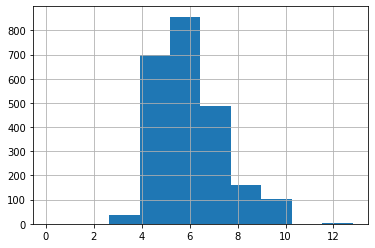

In [12]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isna()` or `notna()` to see where a column is missing/not missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [13]:
df[df.ABV.isna()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,Does not apply
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,Does not apply
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,Does not apply
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,Does not apply
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,Does not apply
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,Does not apply
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,Does not apply
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,Does not apply
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [14]:
df.head()
df.sort_values(by="Location", ascending=False).head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
836,Adam's Stout,Liquid Hero Brewery,"York, PA",American Stout,12 oz.,5.8,40
979,Irregardless IPA,Liquid Hero Brewery,"York, PA",American IPA,12 oz.,6.5,75
978,Schweet Ale,Liquid Hero Brewery,"York, PA",Fruit / Vegetable Beer,12 oz.,5.2,20
977,American Hero,Liquid Hero Brewery,"York, PA",American Amber / Red Ale,12 oz.,5.7,42
278,Nitro Can Coffee Stout,Vault Brewing Company,"Yardley, PA",American Stout,12 oz.,5.2,Does not apply
1677,Field 41 Pale Ale,Bale Breaker Brewing Company,"Yakima, WA",American Pale Ale (APA),12 oz.,4.4,38
1676,Topcutter India Pale Ale,Bale Breaker Brewing Company,"Yakima, WA",American IPA,12 oz.,6.8,70
968,Be Hoppy IPA,Wormtown Brewery,"Worcester, MA",American IPA,16 oz.,6.5,69
2213,Copper Hook (2011),Redhook Brewery,"Woodinville, WA",American Amber / Red Ale,12 oz.,5.8,27
872,Filthy Hoppin' IPA,Dirty Bucket Brewing Company,"Woodinville, WA",American IPA,16 oz.,6.5,72


## List all of the beer from Brooklyn, NY

In [15]:
df_Brooklyn= df[(df.Location == "Brooklyn, NY")& (df.Beer)].head(100)



## What brewery in Brooklyn puts out the most types of canned beer?

In [16]:
df_Brooklyn.groupby('Brewery'). Style. sum().sort_values(ascending=False)


Brewery
KelSo Beer Company             Euro Dark LagerAmerican IPACzech Pilsener
Brooklyn Brewery       English India Pale Ale (IPA)English Pale Mild ...
Evil Twin Brewing      Berliner WeissbierAmerican Double / Imperial I...
Sixpoint Craft Ales    Baltic PorterGoseBelgian Pale AleFruit / Veget...
Name: Style, dtype: object

## What are the five styles of beer that Sixpoint produces the most cans of?

In [17]:
df_Brooklyn[df_Brooklyn.Brewery=='Sixpoint Craft Ales'].sort_values(by="Style", ascending= False). head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1971,Harbinger,Sixpoint Craft Ales,"Brooklyn, NY",Saison / Farmhouse Ale,16 oz.,4.9,35
2142,Righteous Ale (2011),Sixpoint Craft Ales,"Brooklyn, NY",Rye Beer,16 oz.,6.3,57
1269,Righteous Ale,Sixpoint Craft Ales,"Brooklyn, NY",Rye Beer,16 oz.,6.3,57
2074,Autumnation (2011-12) (2011),Sixpoint Craft Ales,"Brooklyn, NY",Pumpkin Ale,16 oz.,6.0,48
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16


## List all of the breweries in New York state.

- *Tip: We want to match **part** of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [18]:
import numpy as np

df=df.dropna(subset=["Location"])

df.dropna().shape

Ny_breweries=df.Location.str.contains("NY.*")






### Now *count* all of the breweries in New York state

In [19]:
Ny_breweries.value_counts()

False    2336
True       74
Name: Location, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [20]:
df=df.dropna(subset=["Style"])

df[df.Style.str.contains("IPA.*")]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter (although I guess hazy IPAs and session IPAs are changing that since I first made this homework!). IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [21]:
#df.Style.median()

#convert column to a number

df[df.IBUs=="Does not apply"]

df.IBUs=df.IBUs.replace({"Does not apply":np.nan})

df.dropna().shape

df=df.dropna(subset=["IBUs"])

df.IBUs=df.IBUs.astype(int)



df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs          int64
dtype: object

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [22]:
df.IBUs.median()


35.0

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*

<AxesSubplot:>

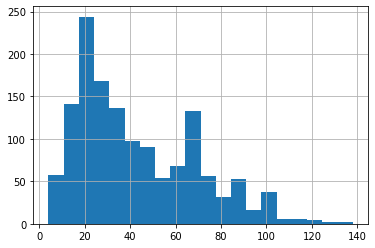

In [23]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [46]:
#df.IBUs.quantile(.75)
result = df[df['IBUs'] > df.IBUs.quantile(q=.75)]['Beer']
print(result)

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 346, dtype: object


## List all of the beers with IBUs below the 25th percentile

In [51]:
df[df["IBUs"] < df.IBUs.quantile(q=.25)]["Beer"]

2                          Wall's End
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
19                        House Lager
                    ...              
2372                 Bombshell Blonde
2385              Bikini Blonde Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 338, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [68]:
# df.groupby(by='Style').IBUs.median().sort_values(by="IBUs", ascending= False)

df.groupby(by='Style').IBUs.median().sort_values(ascending=False)


Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Herbed / Spiced Beer                  15.0
Light Lager                           12.0
Gose                                  10.0
American Adjunct Lager                 9.0
Berliner Weissbier                     8.0
Name: IBUs, Length: 90, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [81]:
df[df['IBUs'] > df.IBUs.quantile(q=.75)].groupby(by="Style").count()['Beer'].sort_values(ascending=False)[0:5]

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Beer, dtype: int64

In [82]:

df[df['IBUs'] < df.IBUs.quantile(q=.25)].groupby(by="Style").count()['Beer'].sort_values(ascending=False)[0:5]

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you *might* just be able to plot twice in the same cell. It depends on your version of pandas/matplotlib! If it doesn't work, you'll need do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

And then youull get two plots on top of each other. They won't be perfect because the bins won't line up without extra work, but it's fine!

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

For making it this far, your reward is my recommendation for Athletic Brewing Co.'s products as the best non-alcoholic beer on the market. Their Run Wild IPA and Upside Dawn are both very solid.